# Time Series Decomposition & Analysis Assignment

In [19]:
#!pip install plotly_express

In [20]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

### Import the monthly sunspots data set into a Pandas dataframe, and convert the Month field to a datetime data type.

In [21]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%203/monthly-sunspots.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2820 non-null   object 
 1   Sunspots  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.1+ KB


In [22]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     2820 non-null   datetime64[ns]
 1   Sunspots  2820 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 44.1 KB


In [23]:
data.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


### Use a line chart to plot the time series.

In [24]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, template='none').update(layout=dict(title=dict(x=0.5)))
    fig.show()

In [36]:
ilinechart(data, 'Month', 'Sunspots', title='Monthly Sunspots')

### Decompose the time series and add columns for the trend, seasonality, and residuals to the data set.

In [26]:
series = data.set_index('Month')

In [27]:
decompose = sm.tsa.seasonal_decompose(series, model='additive', freq=132)
trend = decompose.trend.reset_index()
seasonality = decompose.seasonal.reset_index()
residuals = decompose.resid.reset_index()


<ipython-input-27-93c1fb1677e5>:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



In [28]:
merged = data.merge(trend, on='Month')
merged = merged.merge(seasonality, on='Month')
merged = merged.merge(residuals, on='Month')
merged.columns = ['Month', 'Sunspots', 'Trend', 'Seasonality', 'Residuals']
merged

,Month,Sunspots,Trend,Seasonality,Residuals
0,1749-01-01,58.0,NaN,21.159749,NaN
1,1749-02-01,62.6,NaN,22.168707,NaN
2,1749-03-01,70.0,NaN,24.953612,NaN
3,1749-04-01,55.7,NaN,27.488196,NaN
4,1749-05-01,85.0,NaN,31.781605,NaN
...,...,...,...,...,...
2815,1983-08-01,71.8,NaN,8.364862,NaN
2816,1983-09-01,50.3,NaN,8.181775,NaN
2817,1983-10-01,55.8,NaN,-2.858623,NaN
2818,1983-11-01,33.3,NaN,-5.205687,NaN


### Plot the observed values, trend, seasonality, and residuals on a multi-line chart. You should have a line for each column.

**Hint:** You may need to melt the data so that all the categories are in a single column and all the values are in a single column.

In [29]:
melty = pd.melt(merged, id_vars='Month', value_vars=['Sunspots', 'Trend', 'Seasonality', 'Residuals'], var_name='Variable', value_name='Value')
melty.head()

,Month,Variable,Value
0,1749-01-01,Sunspots,58.0
1,1749-02-01,Sunspots,62.6
2,1749-03-01,Sunspots,70.0
3,1749-04-01,Sunspots,55.7
4,1749-05-01,Sunspots,85.0


In [37]:
ilinechart(melty, 'Month', 'Value', groups='Variable', title='Observed vs Components')

### Add two columns to the data set - one that calculates a rolling mean and another that calculates a rolling standard deviation.

In [31]:
merged['Rolling_Mean'] = merged['Sunspots'].rolling(window=132).mean()
merged['Rolling_Deviation'] = merged['Sunspots'].rolling(window=132).std()

### Plot the rolling mean and standard deviation on a multi-line chart along with the observed values.

In [38]:
melty1 = pd.melt(merged, id_vars='Month', value_vars=['Sunspots', 'Rolling_Mean', 'Rolling_Deviation'], var_name='Variable', value_name='Value')
ilinechart(melty1, 'Month', 'Value', groups='Variable', title='Rolling Mean and Deviation')

### Perform an Augmented Dickey Fuller Test on the data set and determine whether this time series is stationary.

In [33]:
test = sm.tsa.stattools.adfuller(merged['Sunspots'])
results = pd.Series(test[0:4], index=['ADF Test Stat', 'P-Value', 'Lag (count)', 'Observation (count)'])
for key, value in test[4].items():
  results[f'Critical Value {key}'] = value

print(results)

ADF Test Stat         -9.567668e+00
P-Value                2.333452e-16
Lag (count)            2.700000e+01
Observation (count)    2.792000e+03
Critical Value 1%     -3.432694e+00
Critical Value 5%     -2.862576e+00
Critical Value 10%    -2.567321e+00
dtype: float64


### Generate an autocorrelation plot for the data set to determine the level of autocorrelation in this time series.

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams

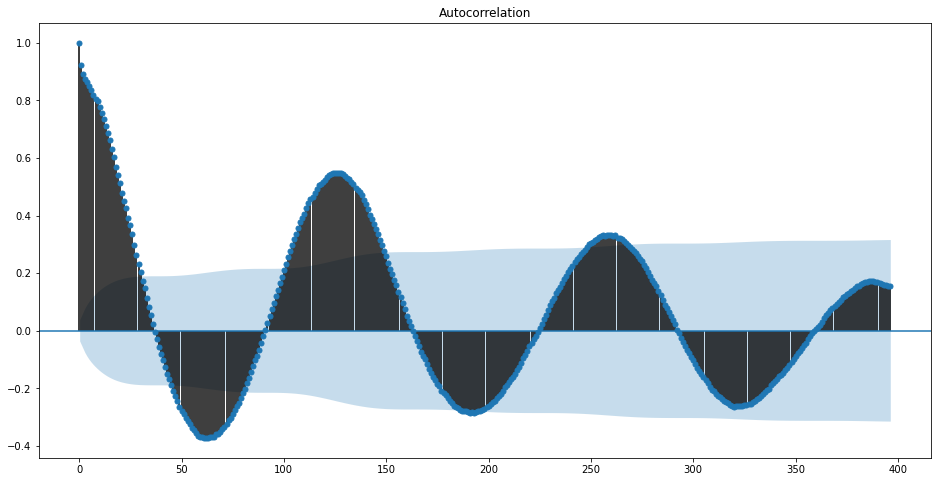

In [35]:
rcParams['figure.figsize'] = 16, 8
fig = plot_acf(series, lags=396)

#lags based on 3 solar cycles of 11 years. Data collected monthly... so 12*11*3